# Retail Sales Dataset
## Goals:
### a. Do a regression to predict what % of products a customer will return given their data
### b. Classification on customer value (low-value vs high-value)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [2]:
customer_data = pd.read_csv("./archive/customers.csv")

/var/folders/nh/7_mzj0nd1r5_2r9cslhpvv0m0000gn/T/ipykernel_76648/1657925214.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv("./archive/customers.csv")


In [3]:
customer_data.head()

,Customer ID,Name,Email,Telephone,City,Country,Gender,Date Of Birth,Job Title
0,1,Tyler Garcia,tyler.garcia@fake_gmail.com,922.970.2265x47563,New York,United States,M,2003-07-15,NaN
1,2,Joshua Miller,joshua.miller@fake_gmail.com,+1-958-729-6169,New York,United States,M,2000-06-16,Records manager
2,3,Alison Marshall DDS,alison.marshall.dds@fake_hotmail.com,+1-645-567-0876x5409,New York,United States,F,2003-07-22,NaN
3,4,Jeffery Acosta,jeffery.acosta@fake_yahoo.com,212.336.0912x84994,New York,United States,M,1996-11-12,Proofreader
4,5,Ashley Sanders,ashley.sanders@fake_hotmail.com,7814535781,New York,United States,F,1998-02-10,Exercise physiologist


In [4]:
customer_data = customer_data.drop(columns=["Name", "Email", "Telephone", "Job Title"])

# Only want to keep useful columns like city, country, gender, DOB

In [5]:
customer_data["Date Of Birth"] = pd.to_datetime(customer_data["Date Of Birth"])

In [6]:
today = datetime.today()
customer_data["Age"] = customer_data["Date Of Birth"].apply(
    lambda dob: today.year
    - dob.year
    - ((today.month, today.day) < (dob.month, dob.day))
)

In [7]:
customer_data.drop(columns=["Date Of Birth"], inplace=True)

In [9]:
customer_data.head()

,Customer ID,City,Country,Gender,Age
0,1,New York,United States,M,21
1,2,New York,United States,M,24
2,3,New York,United States,F,21
3,4,New York,United States,M,28
4,5,New York,United States,F,27


In [10]:
# Need to get information about the customer's transaction history

transaction_data = pd.read_csv("./archive/transactions.csv")
transaction_data.head()

,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total
0,INV-US-001-03558761,1,47162,485,M,NaN,80.5,1,2023-01-01 15:42:00,0.0,80.5,1,7,USD,$,MASU485-M-,Sale,Cash,126.7
1,INV-US-001-03558761,2,47162,2779,G,NaN,31.5,1,2023-01-01 15:42:00,0.4,18.9,1,7,USD,$,CHCO2779-G-,Sale,Cash,126.7
2,INV-US-001-03558761,3,47162,64,M,NEUTRAL,45.5,1,2023-01-01 15:42:00,0.4,27.3,1,7,USD,$,MACO64-M-NEUTRAL,Sale,Cash,126.7
3,INV-US-001-03558762,1,10142,131,M,BLUE,70.0,1,2023-01-01 20:04:00,0.4,42.0,1,6,USD,$,FECO131-M-BLUE,Sale,Cash,77.0
4,INV-US-001-03558762,2,10142,716,L,WHITE,26.0,1,2023-01-01 20:04:00,0.0,26.0,1,6,USD,$,MAT-716-L-WHITE,Sale,Cash,77.0


In [12]:
merged_data = pd.merge(customer_data, transaction_data, on="Customer ID")

In [13]:
merged_data[merged_data["Customer ID"] == 8]

,Customer ID,City,Country,Gender,Age,Invoice ID,Line,Product ID,Size,Color,...,Discount,Line Total,Store ID,Employee ID,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total
56,8,New York,United States,M,18,INV-US-001-03608690,1,3593,M,NaN,...,0.00,32.00,1,13,USD,$,FET-3593-M-,Sale,Credit Card,32.00
57,8,New York,United States,M,18,INV-US-001-03737260,1,10170,S,NaN,...,0.00,32.50,1,7,USD,$,FESH10170-S-,Sale,Credit Card,86.00
58,8,New York,United States,M,18,INV-US-001-03737260,2,11215,M,NaN,...,0.00,53.50,1,7,USD,$,FESP11215-M-,Sale,Credit Card,86.00
59,8,New York,United States,M,18,RET-US-001-03737260,1,10170,S,NaN,...,0.00,-32.50,1,7,USD,$,FESH10170-S-,Return,Credit Card,-86.00
60,8,New York,United States,M,18,RET-US-001-03737260,2,11215,M,NaN,...,0.00,-53.50,1,7,USD,$,FESP11215-M-,Return,Credit Card,-86.00
61,8,New York,United States,M,18,INV-US-001-03743771,1,11454,XL,WHITE,...,0.25,40.50,1,8,USD,$,MAT-11454-XL-WHITE,Sale,Credit Card,131.25
62,8,New York,United States,M,18,INV-US-001-03743771,2,10578,M,NaN,...,0.25,37.88,1,8,USD,$,CHGI10578-M-,Sale,Credit Card,131.25
63,8,New York,United States,M,18,INV-US-001-03743771,3,10130,42,NaN,...,0.25,52.88,1,8,USD,$,MAPA10130-42-,Sale,Credit Card,131.25
64,8,New York,United States,M,18,INV-US-003-03937472,1,7070,P,NaN,...,0.00,32.50,3,36,USD,$,CHSW7070-P-,Sale,Credit Card,32.50


In [ ]:
merged_data.drop(
    columns=[
        "Line",
        "Size",
        "Color",
        "Employee ID",
        "Store ID",
        "Currency Symbol",
        "SKU",
        "Payment Method",
        "Transaction Type",
        "Product ID",
        "Invoice Total",
    ],
    inplace=True,
)

In [17]:
merged_data

,Customer ID,City,Country,Gender,Age,Invoice ID,Unit Price,Quantity,Date,Discount,Line Total,Currency,Invoice Total
0,1,New York,United States,M,21,INV-US-001-03713741,35.0,1,2024-02-03 20:48:00,0.0,35.0,USD,155.5
1,1,New York,United States,M,21,INV-US-001-03713741,62.0,1,2024-02-03 20:48:00,0.0,62.0,USD,155.5
2,1,New York,United States,M,21,INV-US-001-03713741,25.0,2,2024-02-03 20:48:00,0.0,50.0,USD,155.5
3,1,New York,United States,M,21,INV-US-001-03713741,8.5,1,2024-02-03 20:48:00,0.0,8.5,USD,155.5
4,1,New York,United States,M,21,INV-US-001-03716170,41.5,3,2024-02-12 16:43:00,0.0,124.5,USD,124.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416822,1643297,Arruda dos Vinhos,Portugal,M,25,INV-PT-035-01482534,21.5,1,2024-11-27 16:20:00,0.6,8.6,EUR,26.0
6416823,1643297,Arruda dos Vinhos,Portugal,M,25,RET-PT-035-01482534,21.5,1,2024-11-27 00:00:00,0.0,-8.6,EUR,-26.0
6416824,1643297,Arruda dos Vinhos,Portugal,M,25,RET-PT-035-01482534,43.5,1,2024-11-27 00:00:00,0.0,-17.4,EUR,-26.0
6416825,1643302,Arruda dos Vinhos,Portugal,M,52,INV-PT-035-01489745,31.0,1,2024-12-25 15:35:00,0.5,15.5,EUR,15.5


In [36]:
# Group by CustomerID to get total orders
total_orders = merged_data.groupby("Customer ID")["Invoice ID"].count().reset_index()
total_orders.rename(columns={"Invoice ID": "Total Orders"}, inplace=True)

# Get total number of returns per customer
returns = (
    merged_data[merged_data["Transaction Type"] == "Return"]
    .groupby("Customer ID")["Invoice ID"]
    .count()
    .reset_index()
)
returns.rename(columns={"Invoice ID": "Total Returns"}, inplace=True)

# Merge both DataFrames
total_orders_and_returns = pd.merge(
    total_orders, returns, on="Customer ID", how="left"
).fillna(0)

total_orders_and_returns.shape

(1283707, 3)

In [37]:
test = total_orders_and_returns[total_orders_and_returns["Total Returns"] > 0]

total_orders_and_returns

,Customer ID,Total Orders,Total Returns
0,1,8,0.0
1,2,10,0.0
2,3,3,0.0
3,4,4,0.0
4,5,19,0.0
...,...,...,...
1283702,1643293,3,0.0
1283703,1643294,3,0.0
1283704,1643297,4,2.0
1283705,1643302,1,0.0


In [38]:
# merge this table back to merged_data
customer_information = pd.merge(
    customer_data, total_orders_and_returns, on="Customer ID"
)
customer_information.head()

,Customer ID,City,Country,Gender,Age,Total Orders,Total Returns
0,1,New York,United States,M,21,8,0.0
1,2,New York,United States,M,24,10,0.0
2,3,New York,United States,F,21,3,0.0
3,4,New York,United States,M,28,4,0.0
4,5,New York,United States,F,27,19,0.0


In [40]:
customer_information = customer_information[
    ["Customer ID", "Country", "Gender", "Age", "Total Orders", "Total Returns"]
]
customer_information.head()

,Customer ID,Country,Gender,Age,Total Orders,Total Returns
0,1,United States,M,21,8,0.0
1,2,United States,M,24,10,0.0
2,3,United States,F,21,3,0.0
3,4,United States,M,28,4,0.0
4,5,United States,F,27,19,0.0


In [42]:
customer_information.describe().style.format("{:,.2f}")

,Customer ID,Age,Total Orders,Total Returns
count,"1,283,707.00","1,283,707.00","1,283,707.00","1,283,707.00"
mean,"778,749.82",31.31,5.00,0.26
std,"475,425.22",11.88,4.51,0.89
min,1.00,18.00,1.00,0.00
25%,"377,462.50",21.00,2.00,0.00
50%,"755,519.00",28.00,4.00,0.00
75%,"1,182,388.50",39.00,7.00,0.00
max,"1,643,306.00",76.00,59.00,28.00


In [43]:
customer_information["Return Rate"] = (
    customer_information["Total Returns"] / customer_information["Total Orders"]
)

customer_information[customer_information["Return Rate"] > 0].head()

,Customer ID,Country,Gender,Age,Total Orders,Total Returns,Return Rate
7,8,United States,M,18,9,2.0,0.222222
11,12,United States,F,23,16,2.0,0.125000
12,13,United States,F,25,17,1.0,0.058824
17,18,United States,F,19,6,1.0,0.166667
23,24,United States,F,25,11,1.0,0.090909


          Country  Total Orders  Total Returns  Return Rate  Customers Count
1          España        573733        30870.0     0.053806           146990
2          France        649425        34403.0     0.052975           149194
0     Deutschland        750479        39714.0     0.052918           160513
4  United Kingdom        626975        33167.0     0.052900           140800
5   United States       1685659        89133.0     0.052877           298711
6              中国       1551295        81812.0     0.052738           287120
3        Portugal        579261        30528.0     0.052702           100379


/var/folders/nh/7_mzj0nd1r5_2r9cslhpvv0m0000gn/T/ipykernel_33982/1646543236.py:26: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/nh/7_mzj0nd1r5_2r9cslhpvv0m0000gn/T/ipykernel_33982/1646543236.py:26: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/john/dsaiproject/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/john/dsaiproject/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


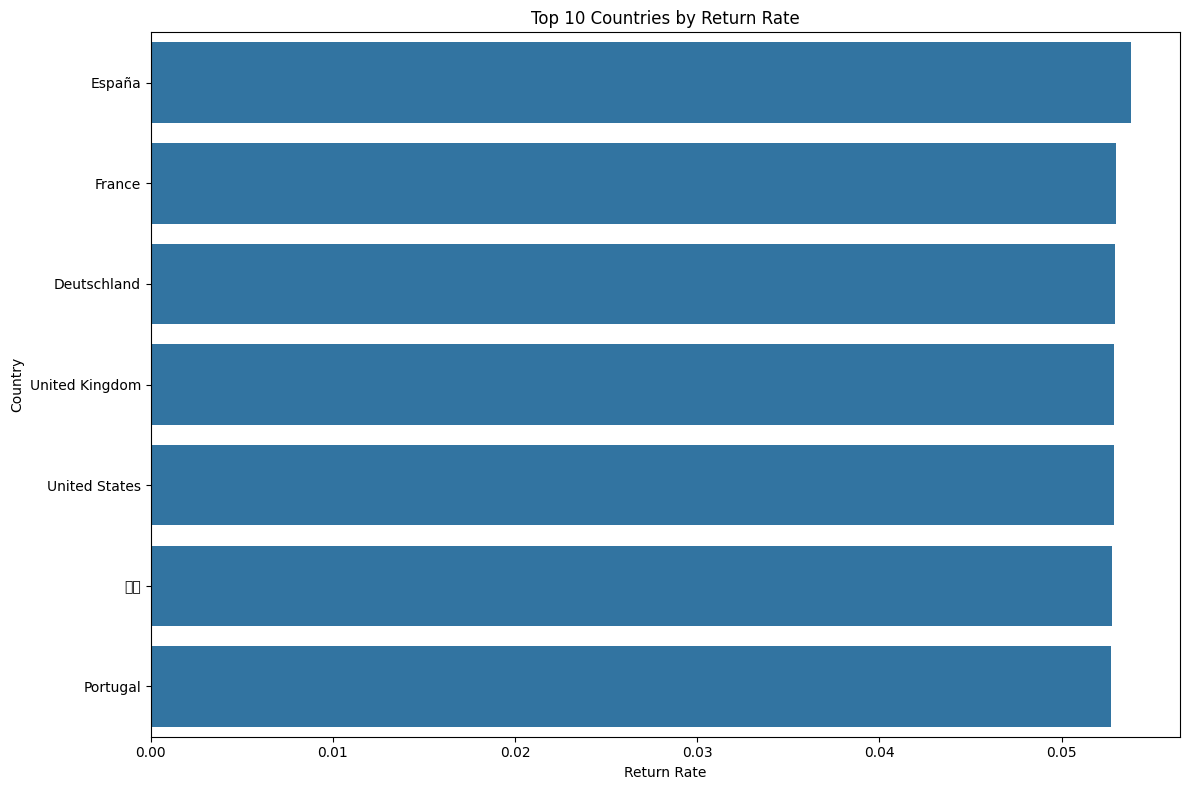

In [44]:
# Create a summary of return rates by country
country_returns = (
    customer_information.groupby("Country")
    .agg({"Customer ID": "count", "Total Orders": "sum", "Total Returns": "sum"})
    .reset_index()
)

# Calculate return rate for each country
country_returns["Return Rate"] = (
    country_returns["Total Returns"] / country_returns["Total Orders"]
)
country_returns["Customers Count"] = country_returns["Customer ID"]
country_returns.drop(columns=["Customer ID"], inplace=True)
country_returns.sort_values("Return Rate", ascending=False, inplace=True)

# Display the top 10 countries with highest return rates
top_10_return_countries = country_returns.head(10)
print(top_10_return_countries)

# Visualize the return rates by country
plt.figure(figsize=(12, 8))
sb.barplot(x="Return Rate", y="Country", data=top_10_return_countries)
plt.title("Top 10 Countries by Return Rate")
plt.xlabel("Return Rate")
plt.ylabel("Country")
plt.tight_layout()
plt.show()